# Milestone 1: Data Exploration
### Install Hints
Make sure to install your conda environment using the doc/envs/pydrop_dev.yml file for the most consistent results
### Goals
The goals of this notebook are to:
1. Begin plotting the data from a single channel and visualize the distribution and spread of samples. 
2. Obtain basic descriptive statistics and attempt to fit a normal distribution to gauge spread.
3. Code an initial clustering proof-of-concept to begin modeling progress. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from scipy.stats import norm
from sklearn.cluster import KMeans

## Data Plotting/Visualization

In [2]:
dframe = pd.read_csv("../../data/X002_droplet_amplitudes.csv", header=0)
cluster01_ch1 = dframe[dframe['Cluster_1_2'] == 1]['Ch1'].to_numpy()# create numpy array for calculations
cluster01_ch2 = dframe[dframe['Cluster_1_2'] == 1]['Ch2'].to_numpy()# create numpy array for calculations
cluster01 = np.concatenate((cluster01_ch1,cluster01_ch2.T), axis=0)
print(cluster01_ch1)
print(cluster01_ch2)
print(cluster01)

[558.0339   664.7144   552.7078   ... 551.658569 621.2386   545.2486  ]
[4676.04    4559.71045 4694.249   ... 4815.39063 4025.00952 4726.37158]
[ 558.0339   664.7144   552.7078  ... 4815.39063 4025.00952 4726.37158]


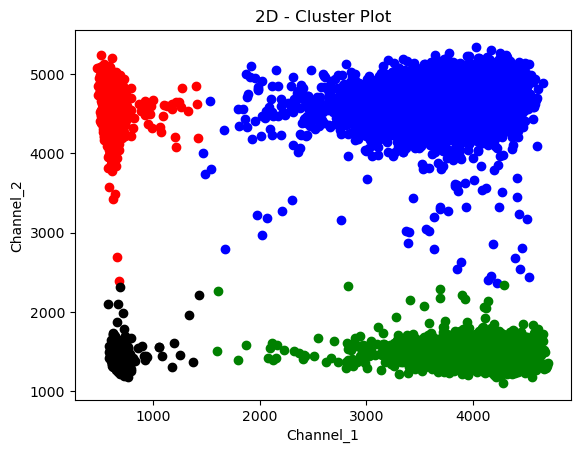

In [3]:
cluster11x = dframe[dframe['Cluster_1_2'] == 11][['Ch1']].to_numpy() 
cluster11y = dframe[dframe['Cluster_1_2'] == 11][['Ch2']].to_numpy()
cluster10x = dframe[dframe['Cluster_1_2'] == 10][['Ch1']].to_numpy() 
cluster10y = dframe[dframe['Cluster_1_2'] == 10][['Ch2']].to_numpy()
cluster01x = dframe[dframe['Cluster_1_2'] == 1][['Ch1']].to_numpy() 
cluster01y = dframe[dframe['Cluster_1_2'] == 1][['Ch2']].to_numpy()
cluster00x = dframe[dframe['Cluster_1_2'] == 0][['Ch1']].to_numpy() 
cluster00y = dframe[dframe['Cluster_1_2'] == 0][['Ch2']].to_numpy()

all_clusters = [cluster11x, cluster11y, cluster10x, cluster10y, cluster01x, cluster01y, cluster00x, cluster00y]

plt.scatter(cluster11x,cluster11y, c='b')
plt.scatter(cluster10x,cluster10y, c='g')
plt.scatter(cluster01x,cluster01y, c='r')
plt.scatter(cluster00x,cluster00y, c='k')
plt.xlabel("Channel_1")
plt.ylabel("Channel_2")
plt.title("2D - Cluster Plot")
plt.show()

# cluster10 = dframe[dframe['Cluster_1_2'] == 10][['Ch1','Ch2']].to_numpy()
# cluster00 = dframe[dframe['Cluster_1_2'] == 0][['Ch1','Ch2']].to_numpy()
# cluster01 = dframe[dframe['Cluster_1_2'] == 1][['Ch1','Ch2']].to_numpy()
# cluster1 = np.concatenate(cluster11, cluster10)
# cluster2 = np.concatenate(cluster01, cluster11)
# print("Cluster1")
# # Start with a square Figure.
# fig = plt.figure(figsize=(6, 6))
# # Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# # the size of the marginal axes and the main axes in both directions.
# # Also adjust the subplot parameters for a square plot.
# gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
#                       left=0.1, right=0.9, bottom=0.1, top=0.9,
#                       wspace=0.05, hspace=0.05)
# # Create the Axes.
# ax = fig.add_subplot(gs[1, 0])
# ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# ax_histy.tick_params(axis="y", labelleft=False)
# # Draw the scatter plot and marginals.
# colors_dict = {0: 'r', 1: 'b'}
# colors = [colors_dict[id] for id in dframe['Cluster_1']]
# ax.scatter(dframe["droplet"], dframe["Ch1"], s=0.5, c=colors)
# ax.set_xlabel("sample")
# ax.set_ylabel("Channel 1 sample value")

# ybins = np.linspace(0, 5500, 100)
# ax_histy.hist(cluster0, bins=ybins, orientation='horizontal', color='r')
# ax_histy.hist(cluster1, bins=ybins, orientation='horizontal', color='b')
# plt.show()

x


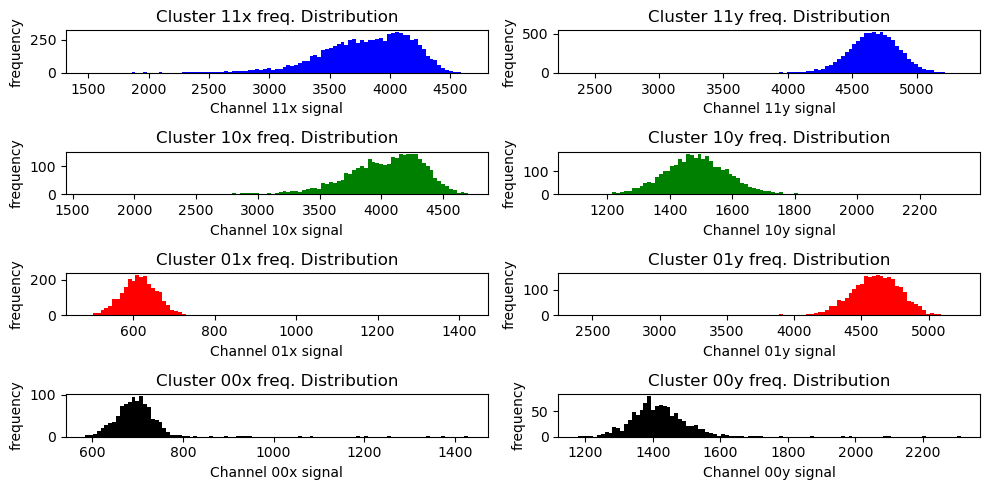

In [4]:
x=8
print('x')

bins = np.linspace(0, 6000, 100)
fig2 = plt.figure(figsize=[10,5])


# for i in range(8):
#     ax_all.append(fig2.add_subplot(4,2,int(i))
    
ax1 = fig2.add_subplot(4,2,1)
ax2 = fig2.add_subplot(4,2,2)
ax3 = fig2.add_subplot(4,2,3)
ax4 = fig2.add_subplot(4,2,4)
ax5 = fig2.add_subplot(4,2,5)
ax6 = fig2.add_subplot(4,2,6)
ax7 = fig2.add_subplot(4,2,7)
ax8 = fig2.add_subplot(4,2,8)

# for things in all_clusters:
    

bins = np.linspace(np.min(cluster11x), np.max(cluster11x), 100)  #11x
ax1.hist(cluster11x, bins, label = 'cluster 11', color='b')
bins = np.linspace(np.min(cluster11y), np.max(cluster11y), 100)  #11y
ax2.hist(cluster11y, bins, label = 'cluster 11', color='b')
bins = np.linspace(np.min(cluster10x), np.max(cluster10x), 100)  #10x
ax3.hist(cluster10x, bins, label = 'cluster 10', color='g')
bins = np.linspace(np.min(cluster10y), np.max(cluster10y), 100)  #10y
ax4.hist(cluster10y, bins, label = 'cluster 10', color='g')
bins = np.linspace(np.min(cluster01x), np.max(cluster01x), 100)  #1x
ax5.hist(cluster01x, bins, label = 'cluster 1', color='r')
bins = np.linspace(np.min(cluster01y), np.max(cluster01y), 100)  #1y
ax6.hist(cluster01y, bins, label = 'cluster 1', color='r')
bins = np.linspace(np.min(cluster00x), np.max(cluster00x), 100)  #0x
ax7.hist(cluster00x, bins, label = 'cluster 0', color='k')
bins = np.linspace(np.min(cluster00y), np.max(cluster00y), 100)  #0y
ax8.hist(cluster00y, bins, label = 'cluster 0', color='k')



# bins = np.linspace(np.min(cluster10), np.max(cluster10), 100)
# ax2.hist(cluster10, bins, label = 'cluster 10', color='g')
# bins = np.linspace(np.min(cluster1), np.max(cluster1), 100)
# ax3.hist(cluster1, bins, label = 'cluster 1', color='r')
# bins = np.linspace(np.min(cluster0), np.max(cluster0), 100)
# ax4.hist(cluster0, bins, label = 'cluster 0', color='k')

ax1.set_xlabel("Channel 11x signal")
ax1.set_ylabel("frequency")
ax1.set_title("Cluster 11x freq. Distribution")
ax2.set_xlabel("Channel 11y signal")
ax2.set_ylabel("frequency")
ax2.set_title("Cluster 11y freq. Distribution")
ax3.set_xlabel("Channel 10x signal")
ax3.set_ylabel("frequency")
ax3.set_title("Cluster 10x freq. Distribution")
ax4.set_xlabel("Channel 10y signal")
ax4.set_ylabel("frequency")
ax4.set_title("Cluster 10y freq. Distribution")
ax5.set_xlabel("Channel 01x signal")
ax5.set_ylabel("frequency")
ax5.set_title("Cluster 01x freq. Distribution")
ax6.set_xlabel("Channel 01y signal")
ax6.set_ylabel("frequency")
ax6.set_title("Cluster 01y freq. Distribution")
ax7.set_xlabel("Channel 00x signal")
ax7.set_ylabel("frequency")
ax7.set_title("Cluster 00x freq. Distribution")
ax8.set_xlabel("Channel 00y signal")
ax8.set_ylabel("frequency")
ax8.set_title("Cluster 00y freq. Distribution")
plt.tight_layout()
plt.show()

## Data Statistics for Each Cluster (using pre-marked data)

In [5]:
cluster11x_df = dframe[dframe['Cluster_1_2'] == 11]['Ch1']
cluster11y_df = dframe[dframe['Cluster_1_2'] == 11]['Ch2']
cluster10x_df = dframe[dframe['Cluster_1_2'] == 10]['Ch1']
cluster10y_df = dframe[dframe['Cluster_1_2'] == 10]['Ch2']
cluster01x_df = dframe[dframe['Cluster_1_2'] == 1]['Ch1']
cluster01y_df = dframe[dframe['Cluster_1_2'] == 1]['Ch2']
cluster00x_df = dframe[dframe['Cluster_1_2'] == 0]['Ch1']
cluster00y_df = dframe[dframe['Cluster_1_2'] == 0]['Ch2']
print("________________________________")
print("Summary Statistics for Cluster 11x")
print("================================")
print(cluster11x_df.describe())
print("________________________________")
print("Summary Statistics for Cluster 11y")
print("================================")
print(cluster11y_df.describe())
print("________________________________")
print("Summary Statistics for Cluster 10x")
print("================================")
print(cluster10x_df.describe())
print("________________________________")
print("Summary Statistics for Cluster 10y")
print("================================")
print(cluster10y_df.describe())
print("________________________________")
print("Summary Statistics for Cluster 01x")
print("================================")
print(cluster01x_df.describe())
print("________________________________")
print("Summary Statistics for Cluster 01y")
print("================================")
print(cluster01y_df.describe())
print("________________________________")
print("Summary Statistics for Cluster 00x")
print("================================")
print(cluster00x_df.describe())
print("________________________________")
print("Summary Statistics for Cluster 00y")
print("================================")
print(cluster00y_df.describe())

________________________________
Summary Statistics for Cluster 11x
count    8344.000000
mean     3792.982079
std       399.956530
min      1472.051880
25%      3566.838080
50%      3847.042725
75%      4089.957705
max      4648.673000
Name: Ch1, dtype: float64
________________________________
Summary Statistics for Cluster 11y
count    8344.000000
mean     4655.147755
std       226.923702
min      2368.127200
25%      4537.895092
50%      4669.384195
75%      4795.967750
max      5342.251460
Name: Ch2, dtype: float64
________________________________
Summary Statistics for Cluster 10x
count    3314.000000
mean     4014.046556
std       342.719716
min      1600.591800
25%      3830.271543
50%      4070.574135
75%      4255.288535
max      4703.250000
Name: Ch1, dtype: float64
________________________________
Summary Statistics for Cluster 10y
count    3314.000000
mean     1488.178471
std       110.431624
min      1104.772580
25%      1419.135345
50%      1485.638325
75%      1553.359190

NameError: name 'cluster0' is not defined

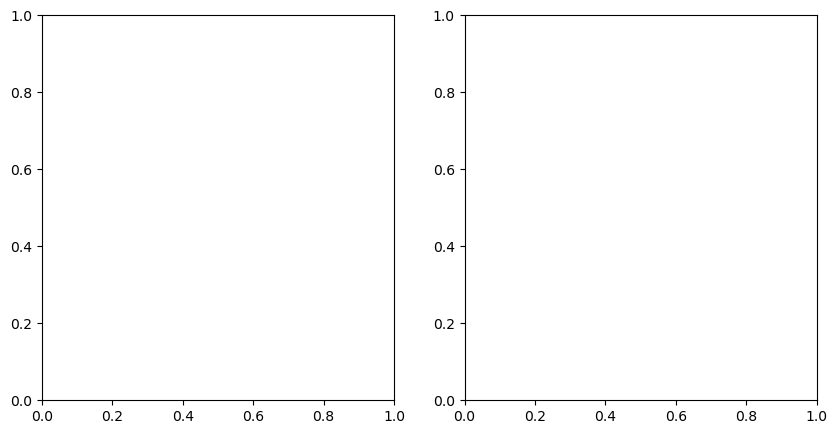

In [6]:
# to verify our mean and stdev. let's try fitting a basic normal distribution to see how skewed the data is:
bins = np.linspace(0, 6000, 100)
fig2 = plt.figure(2, figsize=[10,5])
ax1 = fig2.add_subplot(121)
ax2 = fig2.add_subplot(122)
bins = np.linspace(np.min(cluster0), np.max(cluster0), 100)
ax1.hist(cluster0, bins, label='cluster 0', color='r', density=True, alpha=0.5)
ax1.plot(bins, norm.pdf(bins, np.mean(cluster0), np.std(cluster0)), c='r')
bins = np.linspace(np.min(cluster1), np.max(cluster1), 100)
ax2.hist(cluster1, bins, label = 'cluster 1', color='b', density=True, alpha=0.5)
ax2.plot(bins, norm.pdf(bins, np.mean(cluster1), np.std(cluster1)), c='b')
ax1.set_xlabel("Ch1 signal")
ax2.set_xlabel("Ch1 signal")
ax1.set_ylabel("frequency")
ax1.set_title("Cluster 0 freq. Distribution")
ax2.set_title("Cluster 1 freq. Distribution")
plt.show()

## Initial sklearn Proof-of-Concept Classification

In [ ]:
K = 4
X = dframe['Ch1'].to_numpy().reshape(-1, 1)
Y= dframe['Ch2'].to_numpy().reshape(-1, 1)
true_y = dframe["Cluster_1_2"].to_numpy()
clustering = KMeans(n_clusters=K)
clustering.fit(X)
clustering.fit(Y)
predictionsx = clustering.predict(X)
predictionsy = clustering.predict(Y)
centers = clustering.cluster_centers_
if centers[0,0] < centers[1,0]:  # flip so that cluster "0" corresponds to the 
    predictionsx = np.logical_not(predictionsx)  # cluster with lowest mean value
    predictionsy = np.logical_not(predictionsy)
overlapx = predictionsx == true_y
overlapy = predictionsy == true_y
true_overlapx = overlapx[overlapx == 0]
true_overlapy = overlapy[overlapy == 0]
frac_correctx = len(true_overlapx) / len(overlapx)
frac_correcty = len(true_overlapy) / len(overlapy)

print(f"Fraction of points correctly classified using channel 1: {frac_correctx}")
print(f"Fraction of points correctly classified using channel 2: {frac_correcty}")